# Mini Project Group M26


# Email Spam Detection

## Load Email Data from given .csv file

In [1]:
import turicreate as tc
data=tc.load_sframe('emails.csv')

Finished parsing file /home/dishant/M26_Mini_Project_2020-2021/emails.csv

Parsing completed. Parsed 100 lines in 0.320158 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/dishant/M26_Mini_Project_2020-2021/emails.csv

Parsing completed. Parsed 5728 lines in 0.309045 secs.

In [2]:
data

text,spam
Subject: naturallyirresistible your ...,1
Subject: the stocktrading gunslinger f ...,1
Subject: unbelievable newhomes made easy im ...,1
Subject: 4 color printingspecial request ...,1
"Subject: do not havemoney , get software cds ...",1
"Subject: great nnewshello , welcome to ...",1
Subject: here ' s a hotplay in motion homeland ...,1
Subject: save your moneybuy getting this thing ...,1
Subject: undeliverable :home based business for ...,1
Subject: save your moneybuy getting this thing ...,1


In [3]:
data.show()

Materializing SFrame

In [4]:
print(data.num_rows,data.num_columns)

<bound method SFrame.num_rows of Columns:
	text	str
	spam	int

Rows: 5728

Data:
+-------------------------------+------+
|              text             | spam |
+-------------------------------+------+
| Subject: naturally irresis... |  1   |
| Subject: the stock trading... |  1   |
| Subject: unbelievable new ... |  1   |
| Subject: 4 color printing ... |  1   |
| Subject: do not have money... |  1   |
| Subject: great nnews  hell... |  1   |
| Subject: here ' s a hot pl... |  1   |
| Subject: save your money b... |  1   |
| Subject: undeliverable : h... |  1   |
| Subject: save your money b... |  1   |
+-------------------------------+------+
[5728 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.> <bound method SFrame.num_columns of Columns:
	text	str
	spam	int

Rows: 5728

Data:
+-------------------------------+------+
|              text             | spam |
+-------------------------

## Check for Entries other than 0 and 1 in 'spam' column

In [5]:
print(data[(data['spam']!=1)&(data['spam']!=0)])

+------+------+
| text | spam |
+------+------+
+------+------+
[? rows x 2 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


## Perform word counting on 'text' column to get dictionary with count of each individual word

In [7]:
data['word_count']=tc.text_analytics.count_words(data['text'])

In [8]:
data

text,spam,word_count
Subject: naturallyirresistible your ...,1,"{'interested': 1.0,'have': 1.0, 'this': ..."
Subject: the stocktrading gunslinger f ...,1,"{'albeit': 1.0,'diffusion': 1.0, ..."
Subject: unbelievable newhomes made easy im ...,1,"{'pittman': 1.0,'foward': 1.0, 'form': ..."
Subject: 4 color printingspecial request ...,1,"{'and': 1.0, 'color':1.0, '338': 2.0, ..."
"Subject: do not havemoney , get software cds ...",1,"{'death': 1.0, 'by': 2.0,'d': 1.0, 'finish': 1.0, ..."
"Subject: great nnewshello , welcome to ...",1,"{'day': 1.0,'devitalize': 1.0, ..."
Subject: here ' s a hotplay in motion homeland ...,1,"{'guarantee': 1.0,'sources': 1.0, 'was': ..."
Subject: save your moneybuy getting this thing ...,1,"{'get': 1.0, 'aicohol':1.0, 'with': 1.0, 'mix': ..."
Subject: undeliverable :home based business for ...,1,"{'unknown': 1.0, '6':1.0, 'co': 1.0, '7059': ..."
Subject: save your moneybuy getting this thing ...,1,"{'get': 1.0, 'with': 1.0,'mix': 1.0, 'minutes': ..."


In [10]:
data.tail()

text,spam,word_count
"Subject: altos na gasmodel kim , i know you ...",0,"{'any': 1.0, 'affiliate':1.0, 'reviewed': 1.0, ..."
Subject: power marketresearch i came across ...,0,"{'15': 1.0, 'regions':1.0, 'council': 1.0, ..."
Subject: re : visit tohouston fyi - - - - ...,0,"{'talking': 1.0, '713':1.0, 'call': 1.0, ..."
Subject: ees riskmanagement presentations ...,0,"{'help': 1.0,'structures': 1.0, ..."
Subject: re : vacationvince : i just found ...,0,"{'with': 1.0, 'ok': 1.0,'please': 1.0, '15': ..."
Subject: re : researchand development charges ...,0,"{'group': 1.0, 'was':3.0, 'we': 1.0, 's': ..."
"Subject: re : receiptsfrom visit jim , th ...",0,"{'paper': 1.0, 'html':2.0, 'dossier': 1.0, ..."
Subject: re : enron casestudy update wow ! all ...,0,"{'martinj': 1.0, 'html':2.0, 'fax': 1.0, '4473': ..."
"Subject: re : interestdavid , please , call ...",0,"{'53': 1.0, 'forwarded':1.0, 'numerate': 1.0, ..."
Subject: news : aurora 5. 2 update aurora ...,0,"{'s': 1.0, 'fax': 1.0,'7130': 1.0, 'tel': 1.0, ..."


## Divide dataframe into train and test sets

In [11]:
train_set,test_set=data.random_split(0.9,seed=0)

## Train Binary Classification Model 

In [13]:
spam_model=tc.logistic_classifier.create(train_set,target='spam',features=['word_count'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 4891

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 35116

Number of coefficients      : 35117

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.174278     | 0.879575          | 0.844961            |

| 1         | 5        | 0.500000  | 0.443491     | 0.958086          | 0.879845            |

| 2         | 6        | 0.625000  | 0.503970     | 0.991413          | 0.914729            |

| 3         | 7        | 0.781250  | 0.559985     | 0.994480          | 0.926357            |

| 4         | 8        | 0.976563  | 0.614881     | 0.997138          | 0.949612            |

| 9         | 15       | 1.000000  | 0.914751     | 1.000000          | 0.980620            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

## Analyse and Evaluate the trained model

In [14]:
spam_model.coefficients

name,index,class,value,stderr
(intercept),None,1,-0.4753239359331285,None
word_count,interested,1,-0.034163147796744654,None
word_count,have,1,-0.030006587437821943,None
word_count,this,1,-0.003093142403844048,None
word_count,love,1,0.3501741831808981,None
word_count,surethat,1,0.2658598266244659,None
word_count,no,1,0.03983462682751105,None
word_count,with,1,-0.02384315685150298,None
word_count,provide,1,-0.021829976701340542,None
word_count,extra,1,0.18109513917927442,None


In [15]:
spam_model.evaluate(train_set)

{'accuracy': 0.9990289376577977,
 'auc': 0.9999925191603234,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  3922 |
 |      1       |        0        |   5   |
 |      1       |        1        |  1222 |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.9979583503470805,
 'log_loss': 0.004478793389189782,
 'precision': 1.0,
 'recall': 0.9959250203748982,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+---------------------+-----+------+------+
 | threshold |         fpr         | tpr |  p   |  n   |
 +-----------+---------------------+-----+------+------+
 |    0.0    |         1.0         | 1.0 | 1227 | 3922 |
 |   1e-05   | 0.49847016828148905 | 1.0 | 1227 | 392

## Predict emails in test set as spam(>0.5) or ham(<=0.5)

In [16]:
test_set['predicted_results']=spam_model.predict(test_set,output_type='probability')

In [17]:
test_set

text,spam,word_count,predicted_results
Subject: brighten thoseteeth get your teeth ...,1,"{'then': 1.0, 'via': 1.0,'promotions': 1.0, ...",0.8848808740592056
Subject: search engineposition be the very ...,1,"{'com': 1.0, 'speedy':1.0, 'line': 1.0, ...",0.9865057032952607
Subject: want to acceptcredit cards ? 126432211 ...,1,"{'it': 1.0, 'cecks': 1.0,'do': 1.0, 'subject': ...",0.34582985998212
"Subject: localizedsoftware , all languages ...",1,"{'reqards': 1.0, 'best':1.0, 'ianguaqe': 1.0, ...",0.999894484239538
Subject: select small -cap for astute investors ...,1,"{'reliable': 1.0,'including': 1.0, ...",0.9999999999999963
"Subject: localizedsoftware , all languages ...",1,"{'reqards': 1.0, 'best':1.0, 'lanquage': 1.0, ...",0.9997016776920261
Subject: i know yourcompany ! lt is really ...,1,"{'interested': 1.0,'have': 1.0, 'this': ...",0.9998845774186832
Subject: [ ilug ] re :popular . biz and . com ...,1,"{'listmaster': 1.0,'maintainer': 1.0, ...",0.9999812504008735
Subject: enhance youranatomy the longz sy ...,1,"{'all': 1.0, 'yes': 1.0,'much': 1.0, 'remarked': ...",0.9999665360520967
Subject: learn to playtexas hold ' em and o ...,1,"{'jybwgyay': 1.0, 'here':1.0, 'and': 1.0, 'oth ...",0.9865867493929424


## Evaluate Predictions for Accuracy and Confusion Matrix

In [18]:
spam_model.evaluate(test_set)

{'accuracy': 0.9792746113989638,
 'auc': 0.9991741960555685,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  438  |
 |      1       |        0        |   12  |
 |      1       |        1        |  129  |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.9555555555555556,
 'log_loss': 0.05109208973261122,
 'precision': 1.0,
 'recall': 0.9148936170212766,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+-----+-----+
 | threshold |        fpr         | tpr |  p  |  n  |
 +-----------+--------------------+-----+-----+-----+
 |    0.0    |        1.0         | 1.0 | 141 | 438 |
 |   1e-05   | 0.5068493150684932 | 1.0 | 141 | 438 |
 |   2e-05  

## Again use trained model for predictions on train_set

In [22]:
train_set['predicted_results']=spam_model.predict(train_set,output_type='probability')

In [23]:
train_set

text,spam,word_count,predicted_results
Subject: naturallyirresistible your ...,1,"{'interested': 1.0,'have': 1.0, 'this': ...",0.9999670567004839
Subject: the stocktrading gunslinger f ...,1,"{'albeit': 1.0,'diffusion': 1.0, ...",0.9997889412544468
Subject: unbelievable newhomes made easy im ...,1,"{'pittman': 1.0,'foward': 1.0, 'form': ...",0.9994263098021284
Subject: 4 color printingspecial request ...,1,"{'and': 1.0, 'color':1.0, '338': 2.0, ...",0.9995215114732173
"Subject: do not havemoney , get software cds ...",1,"{'death': 1.0, 'by': 2.0,'d': 1.0, 'finish': 1.0, ...",0.9983694910246458
"Subject: great nnewshello , welcome to ...",1,"{'day': 1.0,'devitalize': 1.0, ...",0.9998872873255704
Subject: here ' s a hotplay in motion homeland ...,1,"{'guarantee': 1.0,'sources': 1.0, 'was': ...",1.0
Subject: save your moneybuy getting this thing ...,1,"{'get': 1.0, 'aicohol':1.0, 'with': 1.0, 'mix': ...",0.9991953953382956
Subject: undeliverable :home based business for ...,1,"{'unknown': 1.0, '6':1.0, 'co': 1.0, '7059': ...",0.9996267908015971
Subject: save your moneybuy getting this thing ...,1,"{'get': 1.0, 'with': 1.0,'mix': 1.0, 'minutes': ...",0.9992559829167609


## Graphically analyse relation b/w given and predicted results

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

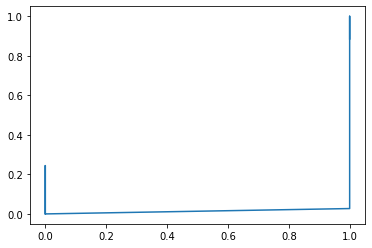

In [29]:
plt.plot(test_set['spam'],test_set['predicted_results'],'-')

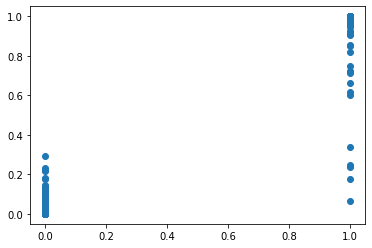

In [30]:
plt.plot(train_set['spam'],train_set['predicted_results'],'o')

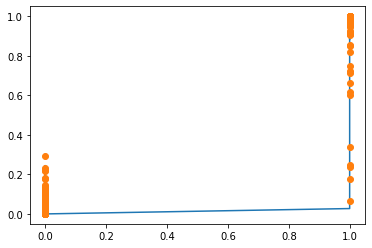

In [31]:
plt.plot(test_set['spam'],test_set['predicted_results'],'-',train_set['spam'],train_set['predicted_results'],'o')